#  <font color = orange> <font size = 8>  **Análise da Serie Histórica dos Valores de Criptomoedas.**

---

<center><img alt="Logo anp" width="30%" src="./img/banner.jpg"></center>

## **1. Objetivo do relatório** 🎯

Este projeto tem como objetivo realizar uma análise exploratória dos valores históricos de criptomoedas, assim como também realizar o tratamento desses dados e por fim realizar consultas trazendo insights importantes para futuras tomadas de decisões.

Esta análise irá nos responder as seguintes perguntas:

1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

##### **1.1. Sobre os dados utilizados**

Os dados fornecidos para a execução desse relatório são informações históricas de preços de algumas das principais criptomoedas por capitalização de mercado. Podemos baixar os arquivos csv  que serão usados [neste link](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).

---

## **2. Coleta dos dados** 🎲

Para podermos iniciar nossos trabalhos, primeiramente iremos importar as bibliotecas que serão usadas para a exploração e possíveis tratamentos, e logo depois coletar os dados necessários e fornecidos para a execução deste relatório.

##### **2.1. Importação das bibliotecas que serão utilizadas**

In [16]:
#importando bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Utilizando a biblioteca warnings para retirar avisos da execução do código para uma visualização mais limpa.
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas dos pacotes:
print('Pacotes Prontos! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy     --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn  --> {sns.__version__}')

Pacotes Prontos! Versões Utilizadas:

Pandas      --> 1.5.3
Numpy     --> 1.23.5
Matplotlib  --> 3.7.1
Seaborn  --> 0.12.2


##### **2.2. Coleta dos dados necessários para análise**

Agora iremos coletar os dados que serão ultilizados fazendo a leitura dos arquivos .csv que estão disponíveis na pasta "**data_10**" no repositório deste projeto.

In [17]:
#Caminho da pasta onde estão os arquivos CSV
pasta = './data_10/'

#Lista todos os arquivos na pasta
arquivos_csv = [arquivo for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]

#Variavel onde será armazenada o dataframe
data_df = pd.DataFrame()

#Esse loop percorre os arquivos csv e lê cada um deles
for arquivo in arquivos_csv:
    caminho_arquivo = os.path.join(pasta, arquivo)
    dados = pd.read_csv(caminho_arquivo)
    print(f'Moeda: {arquivo} coletada com sucesso!')

    #Concatena cada um dos csv ao dataframe
    data_df = pd.concat([data_df, dados], ignore_index=True)

#Todos os arquivos csv que se encontram na pasta data_10 (10 arquivos) foram concatenados e salvos na variavel data_df

Moeda: coin_Tether.csv coletada com sucesso!
Moeda: coin_Cardano.csv coletada com sucesso!
Moeda: coin_Bitcoin.csv coletada com sucesso!
Moeda: coin_Solana.csv coletada com sucesso!
Moeda: coin_Ethereum.csv coletada com sucesso!
Moeda: coin_BinanceCoin.csv coletada com sucesso!
Moeda: coin_Dogecoin.csv coletada com sucesso!
Moeda: coin_Litecoin.csv coletada com sucesso!
Moeda: coin_CryptocomCoin.csv coletada com sucesso!
Moeda: coin_Aave.csv coletada com sucesso!


## **3. Análise exploratória** 🔍

Com os dados carregados iremos ter nosso primeiro contato com eles e conhece-los melhor, compreendendo suas características que o definem e sua estrutura.

##### **3.1. Dimensão do DataSet e primeira visualização**

In [18]:
#visão 5 primeiras e 5 últimas linhas do DataSet
data_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Tether,USDT,2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460e+00,3.033642e+05
1,2,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500e+00,1.525959e+05
2,3,Tether,USDT,2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130e+00,1.525272e+05
3,4,Tether,USDT,2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,9.264720e+01,2.516000e+05
4,5,Tether,USDT,2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,5.819680e+04,2.516000e+05
...,...,...,...,...,...,...,...,...,...,...
17693,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
17694,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
17695,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
17696,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


In [19]:
#Visualizando 5 linhas aleatórias do DataSet
data_df.sample(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
6987,305,Solana,SOL,2021-02-09 23:59:59,8.467784,7.570215,7.869795,7.816793,1.210379e+08,2.047219e+09
16600,113,Crypto.com Coin,CRO,2019-04-06 23:59:59,0.054230,0.046693,0.050580,0.048723,6.119303e+05,2.233697e+08
15399,1903,Litecoin,LTC,2018-07-14 23:59:59,77.541801,76.178497,76.973297,76.722397,1.977760e+08,4.404338e+09
11712,976,Dogecoin,DOGE,2016-08-17 23:59:59,0.000263,0.000243,0.000263,0.000247,3.127080e+05,2.609012e+07
6520,2829,Bitcoin,BTC,2021-01-25 23:59:59,34802.742978,32087.787966,32285.798913,32366.393049,5.989705e+10,6.023501e+11


Observando de forma geral nosso DataSet podemos observar que temos várias criptomoedas listadas e ordenadas por ordem alfabética. Temos o nome da criptomoeda e o símbolo que a identifica. Podemos perceber também que cada linha é um dia diferente e referente ao desempenho que tal moeda se teve naquele dia, mostrando como por exemplo o preço de abertura e fechamento do dia em questão.

Podemos constatar também que nosso DataSet possui **17.698 linhas/registros** por **10 colunas/variáveis**.

##### **3.2. Dicionário das colunas/variáveis**

Ao verificar as 10 colunas existentes do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então compreender melhor cada váriavel.

* `SNo` - Id para identificação das criptomoedas.
* `Name` - Nome da criptomoeda.
* `Symbol` - Símbolo da criptomoeda.
* `Date` - Data da observação e coleta dos valores.
* `High` - Preço mais **ALTO** em um determinado dia.
* `Low` - Preço mais **BAIXO** em um determinado dia.
* `Open` - Preço de abertura em determinado dia.
* `Close` - Preço de fechamento em determinado dia.
* `Volume` - Volume de transações em um determinado dia.
* `Marketcap` - Capitalização de mercado em dólares americanos. Marketcap é uma métrica que representa o valor total de mercado de uma criptomoeda em circulação.

##### **3.3. Checando os tipos de dados**

Ao compreender o que significa cada coluna/váriavel, podemos verificar quais os tipos de dados que compõem cada uma delas.


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        17698 non-null  int64  
 1   Name       17698 non-null  object 
 2   Symbol     17698 non-null  object 
 3   Date       17698 non-null  object 
 4   High       17698 non-null  float64
 5   Low        17698 non-null  float64
 6   Open       17698 non-null  float64
 7   Close      17698 non-null  float64
 8   Volume     17698 non-null  float64
 9   Marketcap  17698 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.4+ MB


Ao verificar os tipos de dados de cada váriavel, podemos notar um único problema na coluna **"Date"** que está como do tipo **object**, ou seja, ela está como uma string e não como uma data. Iremos realizar esse tratamento logo mais.

##### **3.4. Verificando valores nulos**

Ao verificar valores nulos, podemos ter o concentimento se teremos que realizar o tratamento desses valores, ou se apenas podemos remove-los do DataSet. Os valores nulos atrapalham nossas analises com possíveis erros e dificultam uma modelagem e previsões.

In [21]:
data_df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Nosso DataSet não contém valores nulos, portanto, seguiremos explorando o DataSet.

##### **3.5. Checando Outliers**

Nesta etapa verificaremos outliers em nosso DataSet, mas será que devemos buscar outliers e leva-los em consideração com esses dados?

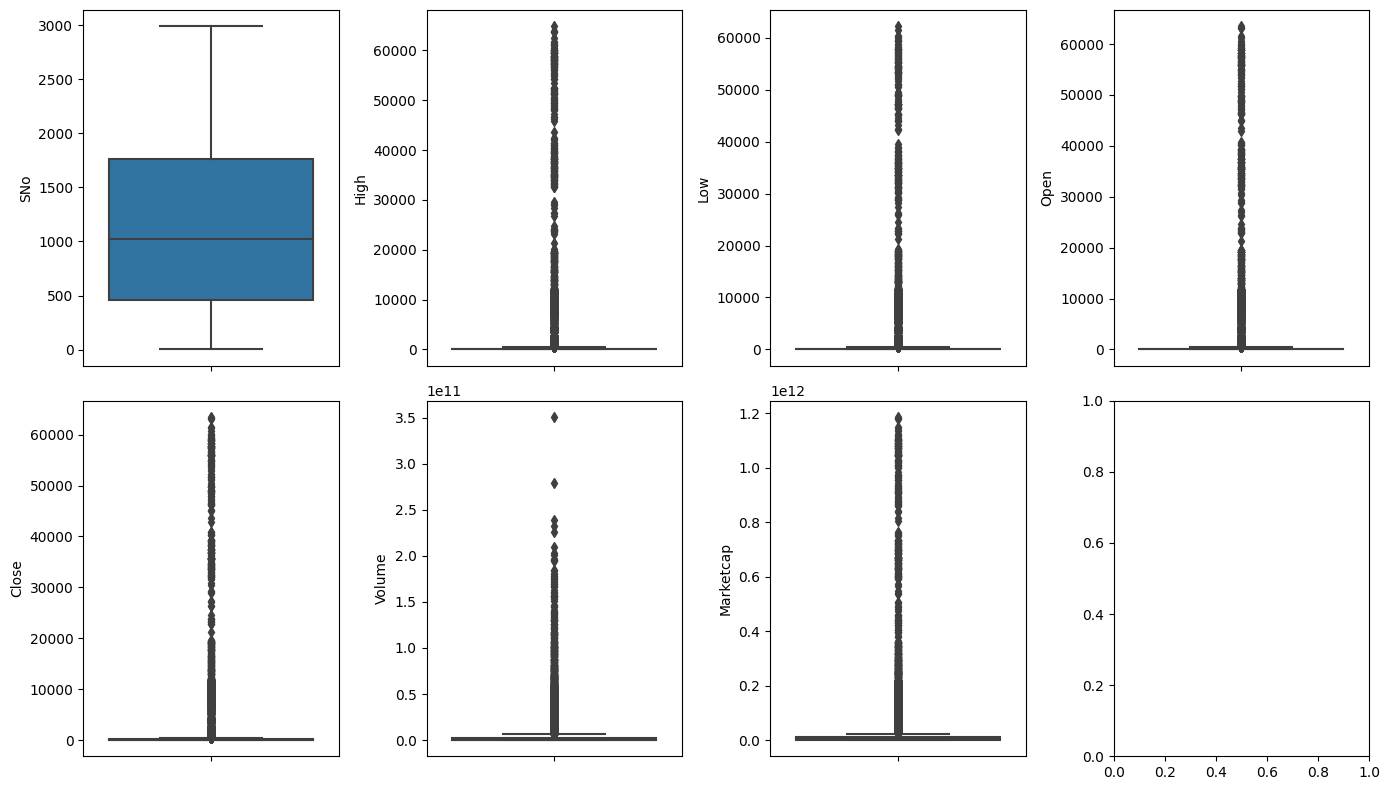

In [22]:
#Este loop percorre as colunas do DataSet verificando se tal váriavel é númerica, caso sim, é adicionado na lista
variaveis_numericas = []
for i in data_df.columns[0:21].tolist():
        if data_df.dtypes[i] == 'int64' or data_df.dtypes[i] == 'float64':
            # print(i, ':' , eleitorado.dtypes[i])
            variaveis_numericas.append(i)

#Criando gráfico
plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 4)

linha = 0
coluna = 0

#Este loop percorre a lista da colunas númericas e plota um gráfico para cada váriavel
for i in variaveis_numericas:
    sns.boxplot(data = data_df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

Observando os gráficos boxplot para cada váriavel acima, podemos constatar de fato que com esses dados não devemos considerar outliers, pois são valores específicos de preços das criptomoedas, ou seja, os preços variam muito durante os anos em que os dados das criptomoedas foram coletadas. Por exemplo, em 2013 o Bitcoin tinha um valor muito abaixo do que ele teve em 2021 [(Fonte)](https://academy.bit2me.com/pt/precio-historico-del-bitcoin/). Por esse motivo, essa análise de outliers não cabe a esta ocasião.

##### **3.6. Analisando correlações**

Nesta etapa iremos analisar o grau de relacionamento entre as váriaveis do nosso DataSet.

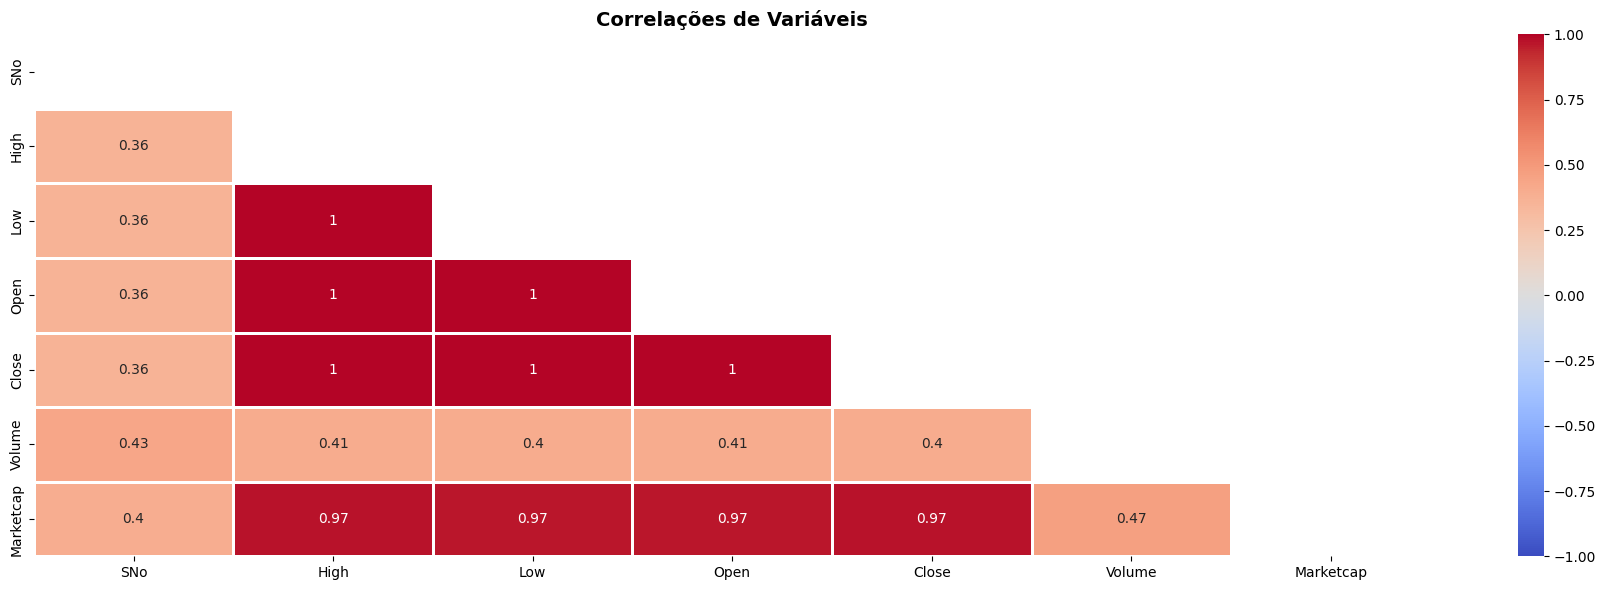

In [23]:
#Usando o metodo corr() para verificar a correlação das variaveis
correlacao_data = data_df.corr()

#Criando uma máscara triangular superior
mask = np.triu(np.ones_like(correlacao_data, dtype=bool))

#Definindo tamanho da figura:
fig, ax = plt.subplots(figsize=(18, 6))

#Criando o Heatmap:
ax = sns.heatmap(data=correlacao_data,
                 mask=mask,
                 vmin=-1,
                 vmax=1,
                 annot=True,
                 linewidths=1,
                 cmap='coolwarm')

# Formatação:
plt.title('Correlações de Variáveis', pad=6, fontdict={'size': 14, 'weight': 'bold'})

plt.show()

Ao analisar o Heatmap acima, podemos notar algumas váriaveis que se tem uma correlação perfeita. Isso acontece pois, assim como a análise feita com os outliers no tópico anterior, as criptomoedas tiveram um grande aumento de preço ao decorrer de todos os anos registrados nesse DataSet. Por exemplo, quando mais aumentavam o preço de abertura(open) e o de fechamento(close) mais aumentavam o valor de capitalização de mercado(Marketcap). [(Fonte)](https://livecoins.com.br/preco-historico-do-bitcoin/#:~:text=Em%202017%20o%20Bitcoin%20alcan%C3%A7ou,superou%20os%20US%24%2029%20mil.)

---

## **4. Tratamento dos dados** 📚

Nessa etapa faremos o tratamento dos dados que coletamos e conhecemos nas etapas acima, serão analisados quais colunas e dados não necessitaremos para obter nossos insights, e quais dados precisarão ser tratados.

Ao explorar os dados coletados podemos pontuar alguns tratamento que precisamos realizar no DataSet:

- Remover coluna **"SNo"**, pois se trata de apenas um id para identificação das criptos.
- Renomear as colunas para português, facilitando o entendimento.
- Retirar a hora na coluna **"Date"**, pois é uma informação irrelevante.
- Mudar o tipo de dado da coluna **"Date"** para formato de data, pois está como object.

Como iremos alterar e modificar nosso DataSet, primeiramente vamos criar uma cópia para podermos realizar os tratamento necesários. O nome do DataSet limpo será **data_clean**.

##### **4.1. Definir colunas necessárias**

In [24]:
#Deletando coluna e salvando em nova varaivel
data_clean = data_df.drop('SNo', axis=1)

data_clean.sample()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
8265,Ethereum,ETH,2018-09-11 23:59:59,198.506,180.596,198.177,185.066,1.568900e+09,1.885838e+10


Podemos constatar que a coluna **"SNo"** foi removida do nosso DataSet.

##### **4.2. Renomeando colunas**

In [25]:
#Definindo nomes das váriaveis que serão renomeados
data_clean.rename(
    columns={
        'Name': 'Nome',
        'Symbol': 'Simbolo',
        'Date': 'Data',
        'High': 'Maximo',
        'Low': 'Minimo',
        'Open': 'Abertura',
        'Close': 'Fechamento',
        'Volume': 'Volume',
        'Marketcap': 'Cap. de Mercado'
    }, inplace=True
)

data_clean.sample()

,Nome,Simbolo,Data,Maximo,Minimo,Abertura,Fechamento,Volume,Cap. de Mercado
3990,Bitcoin,BTC,2014-02-21 23:59:59,582.960022,530.469971,556.880005,574.159973,47308100.0,7.135603e+09


Como podemos observar todas as váriaveis foram renomeadas para português facilitando o entendimento das mesmas.

##### **4.3. Tratando a váriavel "Data"**

A coluna **"Data"** refere-se a data em que ocerreu a coleta dos dados de determinada moeda. Porém nos registros junto com a data, temos a hora, os minutos e segundo em que ocorreu essa coleta. Como a hora é igual para todos os registros de todas as criptomoedas, iremos remove-la pois torna-se uma informação irrelevante para este relatório.

In [26]:
#filtrando a coluna data e
data_clean['Data'] = pd.to_datetime(data_clean['Data']).dt.date

data_clean.sample()

,Nome,Simbolo,Data,Maximo,Minimo,Abertura,Fechamento,Volume,Cap. de Mercado
15335,Litecoin,LTC,2018-05-11,149.445007,134.725998,149.445007,137.117004,530416000.0,7.745751e+09


Como podemos constatar na coluna **Data** as horas foram retiradas, deixando apenas a informação de data no formato YYYY-MM-DD.

Seguindo nosso tratamento, agora iremos alterar o tipo de dado da váriavel em questão. Ela está com os registros do tipo "object", ou seja, está como uma string, abaixo faremos essa conversão para o tipo "datetime".

In [27]:
#Mudando o tipo de object para datetime
data_clean['Data'] = data_clean['Data'].apply(pd.to_datetime)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Nome             17698 non-null  object        
 1   Simbolo          17698 non-null  object        
 2   Data             17698 non-null  datetime64[ns]
 3   Maximo           17698 non-null  float64       
 4   Minimo           17698 non-null  float64       
 5   Abertura         17698 non-null  float64       
 6   Fechamento       17698 non-null  float64       
 7   Volume           17698 non-null  float64       
 8   Cap. de Mercado  17698 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.2+ MB


Como podemos constatar, a váriavel "data" está agora do tipo correto como "datetime". Essa mudança possibilita uma melhor agilidade e tira a possibilidade de erros futuros, quando formos realizar análises com essa váriavel.

Para finalizar esta etapa, vamos salvar em um novo arquivo csv, o DataSet tratado e modificado com as ações necessárias.

In [28]:
#definindo o caminho da pasta e o nome do arquivo a ser salvo
caminho_pasta = './data_clean/'
nome_csv = 'data_clean.csv'
caminho = caminho_pasta + nome_csv
data_clean['Data']=data_clean['Data'].apply(lambda x:str(x))
data_clean.to_csv(caminho, index=False)


---

## **5. Analises** 📊

- 1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?

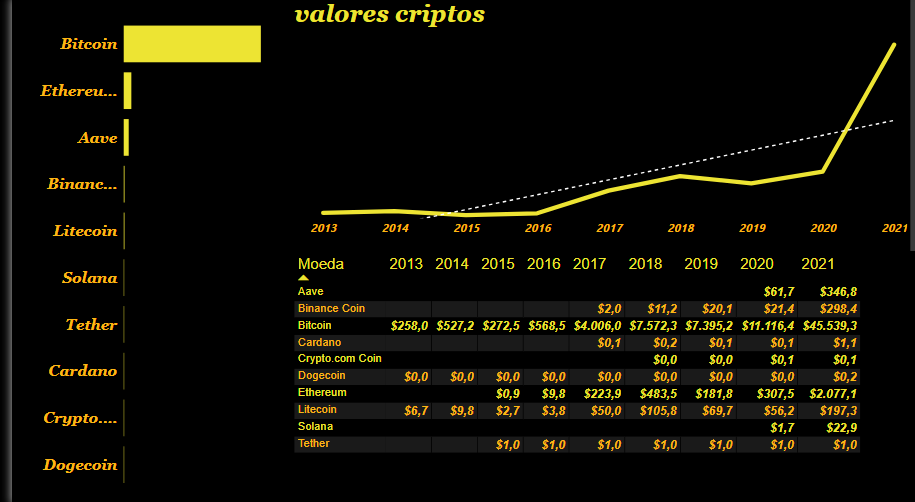

Como podemos identificar no gráfico e valores auxiliares, todas as criptomoedas tiveram uma valorização ao longo do período, com incremento do valor ao final do relatório, os valores se mantiveram estáveis de 2013 a 2016, a partir de 2016 tivemos um crescimento significativo até 2020, o pico ocorrendo em 2021 puxado pela pandemia, onde foi marcado pela adoção institucional de cripto, com investidores de todos os perfis reconhecendo os ativos digitais como uma classe que estava transformando todas as indústrias.

2. Quais os valores médios para todas as criptomoedas?

In [44]:
media_criptos = data_clean.groupby('Nome')[['Abertura', 'Fechamento']].mean()
media_criptos = media_criptos.sort_values(by='Fechamento', ascending=False)
media_criptos

,Abertura,Fechamento
Nome,,
Bitcoin,6700.146240,6711.290443
Ethereum,382.879899,383.910691
Aave,254.506688,255.525845
Binance Coin,52.028231,52.250308
Litecoin,49.247365,49.279008
Solana,10.400225,10.471388
Tether,1.000656,1.000696
Cardano,0.255287,0.256313
Crypto.com Coin,0.081802,0.081912


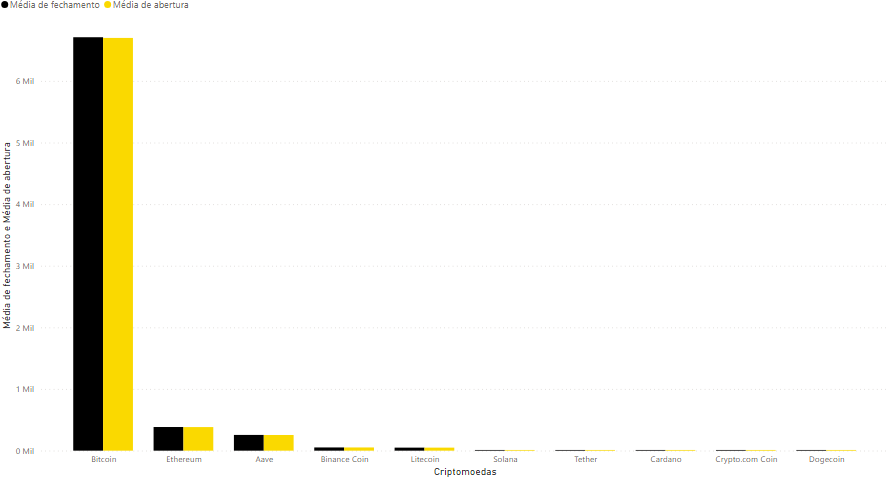

Os dados mostram que o Bitcoin teve teve a maior média de fechamento com 6.711,29 e foi 48.764.419,23% maior do que Dogecoin, que teve o menor média de fechamento em 0,01.
Em todas as 10 Criptomoedas, a média de fechamento variou de 0,01 para 6.711,29 e média de abertura variou de 0,01 para 6.700,15, em todas a média de fechamento sempre é superior a média de abertura, mostrando que no período a têndencia na média sempre foi de ganho no fechamento.

In [47]:
correlacao = media_criptos['Abertura'].corr(media_criptos['Fechamento'])
correlacao

0.9999999949654004

Podemos constatar que a média de fechamento e média de abertura estão correlacionados positivamente entre si.

- 3. Em quais anos houve maiores quedas e valorizações?